## Twitter Sentiment Analysis

In [1]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import re
import warnings
warnings.filterwarnings('ignore')

## Dataset

In [3]:
df = pd.read_csv('./input/training.csv',
                 delimiter=',', encoding='ISO-8859-1')
df.columns = ['Sentiment','id','date','query','user','text']
df.head()

,Sentiment,id,date,query,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [4]:
df = df[['Sentiment','text']]

In [5]:
df.columns

Index(['Sentiment', 'text'], dtype='object')

In [6]:
df.Sentiment.value_counts()

Sentiment
0    799996
4    248576
Name: count, dtype: int64

In [7]:
df['Sentiment'] = df['Sentiment'].replace({4:1})

* 0 represent Negative sentiment
* 1 represents Positive sentiment

#### Visualizing the count

<Axes: xlabel='Sentiment', ylabel='count'>

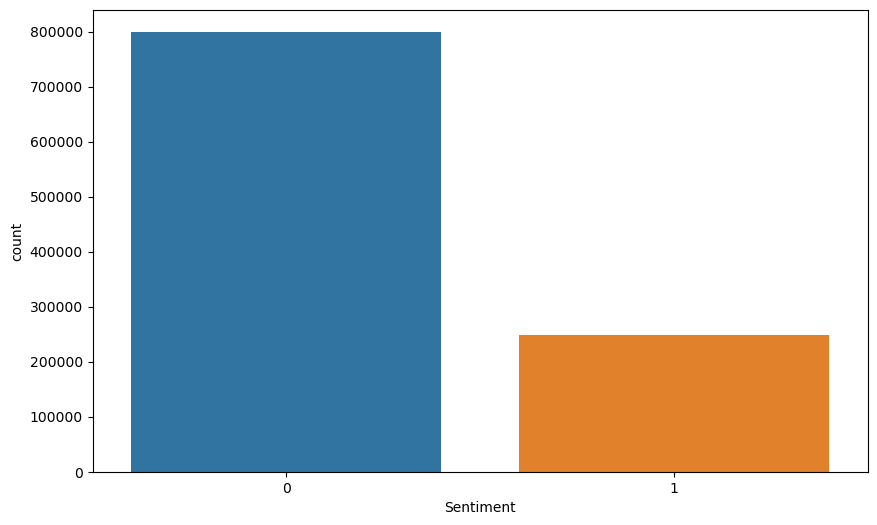

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', data=df, order = df['Sentiment'].value_counts().index)

In [9]:
df.isna().sum().sum()

0

**Inference: The data is unbalanced therfore we will downsample the data to have same count for each sentiment**

## Downsampling the dataset

In [10]:
from sklearn.utils import resample

In [11]:
## majority class 0
df_majority = df[df['Sentiment']==0]
## minority class 1
df_minority = df[df['Sentiment']==1]

In [12]:
df_minority.shape

(248576, 2)

In [13]:
# downsample the majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,   
                                 n_samples=len(df_minority),    
                                 random_state=1234) 

In [14]:
df = pd.concat([df_minority, df_majority_downsampled], axis=0)

#### Visualizing after downsampling

248576 data for each class

<Axes: xlabel='Sentiment', ylabel='count'>

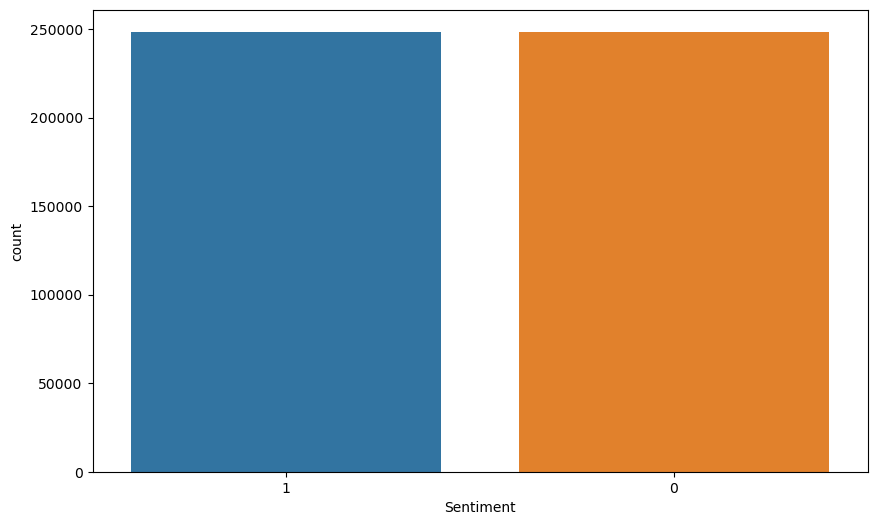

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', data=df, order = df['Sentiment'].value_counts().index)

## Data Preprocessing

1. removing stop words
2. removing punctuations
3. Lemmatizing
4. removing tags
5. removing special characters 
6. lowercase conversion

In [40]:
## remove stopwords and punctuation marks
stuff_to_be_removed = list(stopwords.words('english'))+list(punctuation)


corpus = df['text'].tolist()
print(len(corpus))
print(corpus[0])

497152
I LOVE @Health4UandPets u guys r the best!! 


In [53]:
%%time
final_corpus = []
final_corpus_joined = []

for i in df.index:

    text = re.sub('[^a-zA-Z]', ' ', df['text'][i])
    #Convert to lowercase
    text = text.lower()
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()

    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text 
            if not word in stuff_to_be_removed] 
    
    #print(text)

    text1 = " ".join(text)
    final_corpus.append(text)  # Append the tokenized list to final_corpus
    final_corpus_joined.append(text1)

    #print(text1)

CPU times: total: 12.2 s
Wall time: 26.1 s


In [55]:
print(final_corpus[0:10])
print(final_corpus_joined[0:10])

[['love', 'health', 'uandpets', 'u', 'guy', 'r', 'best'], ['im', 'meeting', 'one', 'besties', 'tonight', 'cant', 'wait', 'girl', 'talk'], ['darealsunisakim', 'thanks', 'twitter', 'add', 'sunisa', 'got', 'meet', 'hin', 'show', 'dc', 'area', 'sweetheart'], ['sick', 'really', 'cheap', 'hurt', 'much', 'eat', 'real', 'food', 'plus', 'friend', 'make', 'soup'], ['lovesbrooklyn', 'effect', 'everyone'], ['productoffear', 'tell', 'burst', 'laughing', 'really', 'loud', 'thanks', 'making', 'come', 'sulk'], ['r', 'keith', 'hill', 'thans', 'response', 'ihad', 'already', 'find', 'answer'], ['keepinupwkris', 'jealous', 'hope', 'great', 'time', 'vega', 'like', 'acm', 'love', 'show'], ['tommcfly', 'ah', 'congrats', 'mr', 'fletcher', 'finally', 'joining', 'twitter'], ['e', 'voip', 'responded', 'stupid', 'cat', 'helping', 'type', 'forgive', 'error']]
['love health uandpets u guy r best', 'im meeting one besties tonight cant wait girl talk', 'darealsunisakim thanks twitter add sunisa got meet hin show dc a

#### Storing the cleaned data seperately

In [42]:
data_cleaned = pd.DataFrame()
data_cleaned["text"] = final_corpus_joined
data_cleaned["Sentiment"] = df["Sentiment"].values

In [43]:
data_cleaned['Sentiment'].value_counts()

Sentiment
1    248576
0    248576
Name: count, dtype: int64

In [44]:
data_cleaned.head()

,text,Sentiment
0,love health uandpets u guy r best,1
1,im meeting one besties tonight cant wait girl ...,1
2,darealsunisakim thanks twitter add sunisa got ...,1
3,sick really cheap hurt much eat real food plus...,1
4,lovesbrooklyn effect everyone,1


## EDA

In [21]:
data_eda = pd.DataFrame()
data_eda['text'] = final_corpus
data_eda['Sentiment'] = df["Sentiment"].values
data_eda.head()

,text,Sentiment
0,"[love, health, uandpets, u, guy, r, best]",1
1,"[im, meeting, one, besties, tonight, cant, wai...",1
2,"[darealsunisakim, thanks, twitter, add, sunisa...",1
3,"[sick, really, cheap, hurt, much, eat, real, f...",1
4,"[lovesbrooklyn, effect, everyone]",1


In [22]:
# Storing positive data seperately
positive = data_eda[data_eda['Sentiment'] == 1]
positive_list = positive['text'].tolist()

# Storing negative data seperately

negative = data_eda[data_eda['Sentiment'] == 0]
negative_list = negative['text'].tolist()

In [56]:
print(positive_list[1:10])

[['im', 'meeting', 'one', 'besties', 'tonight', 'cant', 'wait', 'girl', 'talk'], ['darealsunisakim', 'thanks', 'twitter', 'add', 'sunisa', 'got', 'meet', 'hin', 'show', 'dc', 'area', 'sweetheart'], ['sick', 'really', 'cheap', 'hurt', 'much', 'eat', 'real', 'food', 'plus', 'friend', 'make', 'soup'], ['lovesbrooklyn', 'effect', 'everyone'], ['productoffear', 'tell', 'burst', 'laughing', 'really', 'loud', 'thanks', 'making', 'come', 'sulk'], ['r', 'keith', 'hill', 'thans', 'response', 'ihad', 'already', 'find', 'answer'], ['keepinupwkris', 'jealous', 'hope', 'great', 'time', 'vega', 'like', 'acm', 'love', 'show'], ['tommcfly', 'ah', 'congrats', 'mr', 'fletcher', 'finally', 'joining', 'twitter'], ['e', 'voip', 'responded', 'stupid', 'cat', 'helping', 'type', 'forgive', 'error']]


In [23]:
positive_all = " ".join([word for sent in positive_list for word in sent ])
negative_all = " ".join([word for sent in negative_list for word in sent ])

In [62]:
print(len(positive_all))

12258975


In [25]:
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 660.6 kB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 3.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


#### Word Cloud Positive data

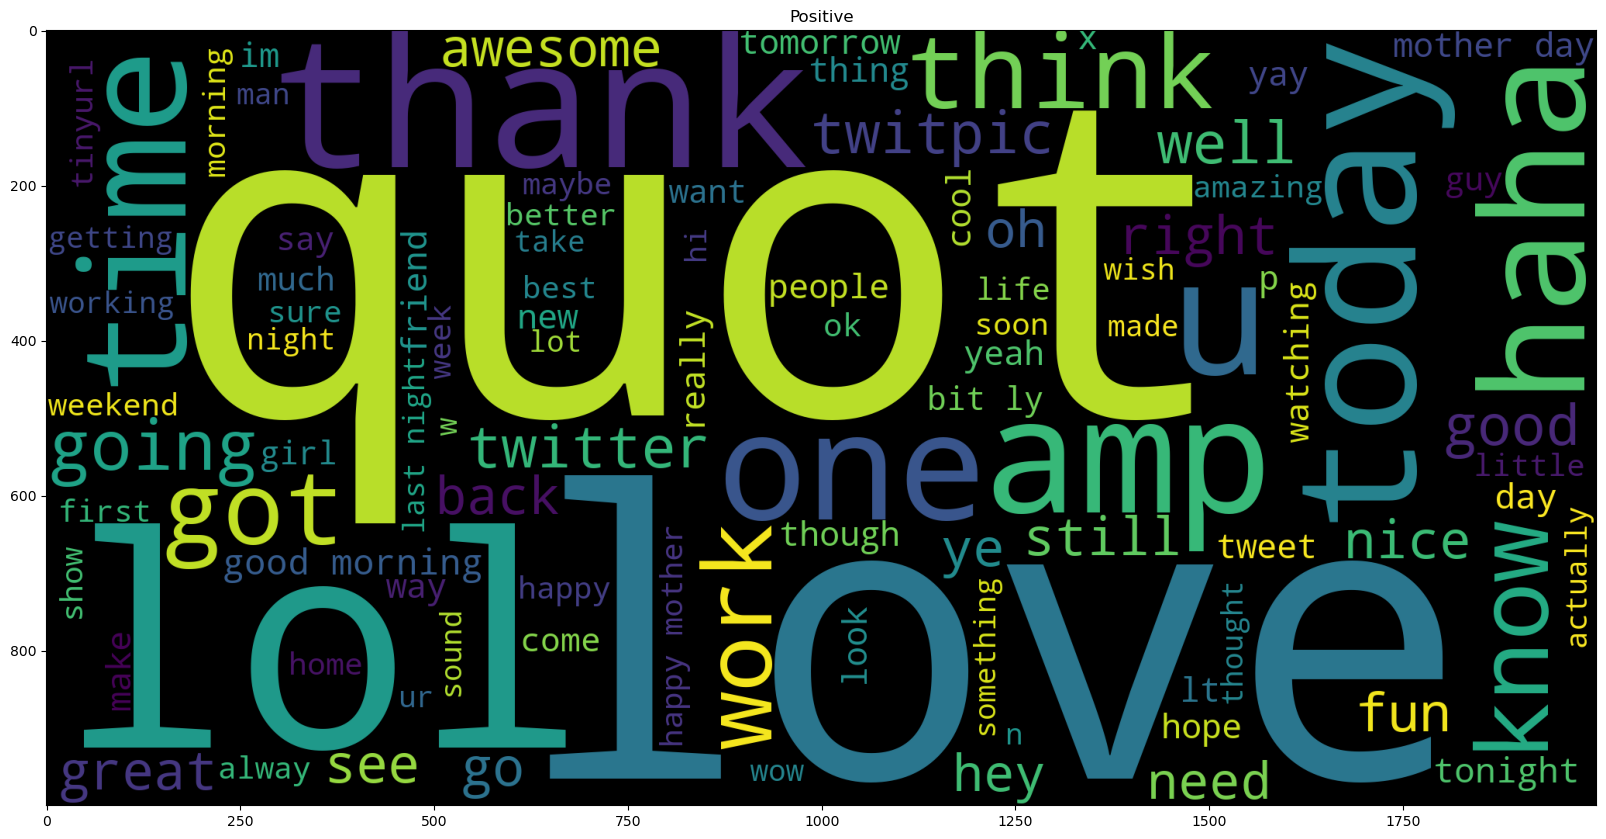

In [26]:

from wordcloud import WordCloud
WordCloud()
wordcloud = WordCloud(width=2000,
                      height=1000,
                      background_color='black',
                      max_words = 100).generate(positive_all)

plt.figure(figsize=(20,30))
plt.imshow(wordcloud)
plt.title("Positive")
plt.show()

#### Word CLoud Negative data

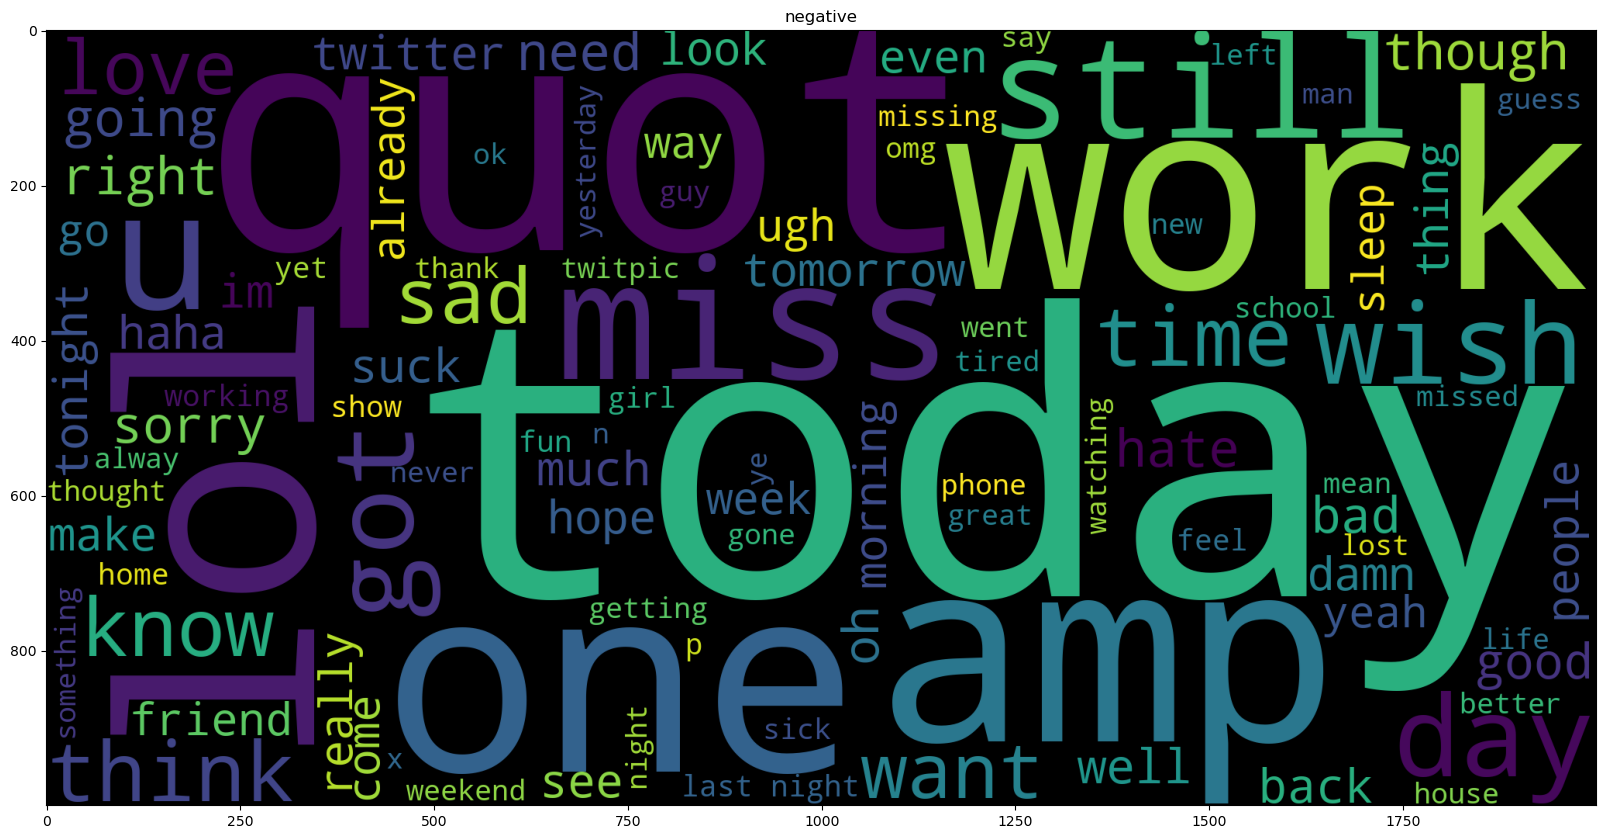

In [27]:
from wordcloud import WordCloud
WordCloud()
wordcloud = WordCloud(width=2000,
                      height=1000,
                      background_color='black',
                      max_words = 100).generate(negative_all)

plt.figure(figsize=(20,30))
plt.imshow(wordcloud)
plt.title("negative")
plt.show()

**Inference:**
* Positive data has words like Thank, love , LOL, Haha ets 
* Negative data has words like work, sad, tired, suck sorry <br>
Some of the words are still common in both such as Lol, quot

### One word count

In [39]:
for i in range(10):
    print(positive_list[i])

['love', 'health', 'uandpets', 'u', 'guy', 'r', 'best']
['im', 'meeting', 'one', 'besties', 'tonight', 'cant', 'wait', 'girl', 'talk']
['darealsunisakim', 'thanks', 'twitter', 'add', 'sunisa', 'got', 'meet', 'hin', 'show', 'dc', 'area', 'sweetheart']
['sick', 'really', 'cheap', 'hurt', 'much', 'eat', 'real', 'food', 'plus', 'friend', 'make', 'soup']
['lovesbrooklyn', 'effect', 'everyone']
['productoffear', 'tell', 'burst', 'laughing', 'really', 'loud', 'thanks', 'making', 'come', 'sulk']
['r', 'keith', 'hill', 'thans', 'response', 'ihad', 'already', 'find', 'answer']
['keepinupwkris', 'jealous', 'hope', 'great', 'time', 'vega', 'like', 'acm', 'love', 'show']
['tommcfly', 'ah', 'congrats', 'mr', 'fletcher', 'finally', 'joining', 'twitter']
['e', 'voip', 'responded', 'stupid', 'cat', 'helping', 'type', 'forgive', 'error']


In [66]:
def get_count(data):
    dic = {}
    for i in data:
        for j in i:
            if j not in dic:
                dic[j]=1
            else:
                dic[j]+=1    
            
    return(dic)
count_corpus = get_count(positive_list)

In [67]:
print(count_corpus)

{'love': 14982, 'health': 139, 'uandpets': 6, 'u': 12448, 'guy': 3483, 'r': 1874, 'best': 3431, 'im': 6434, 'meeting': 662, 'one': 8907, 'besties': 40, 'tonight': 3642, 'cant': 1515, 'wait': 4036, 'girl': 2895, 'talk': 1287, 'darealsunisakim': 3, 'thanks': 11403, 'twitter': 7196, 'add': 770, 'sunisa': 1, 'got': 8267, 'meet': 1108, 'hin': 5, 'show': 2899, 'dc': 143, 'area': 193, 'sweetheart': 105, 'sick': 486, 'really': 5887, 'cheap': 146, 'hurt': 370, 'much': 5265, 'eat': 1078, 'real': 1229, 'food': 1170, 'plus': 394, 'friend': 4320, 'make': 5340, 'soup': 177, 'lovesbrooklyn': 2, 'effect': 131, 'everyone': 3105, 'productoffear': 1, 'tell': 1916, 'burst': 24, 'laughing': 254, 'loud': 172, 'making': 1353, 'come': 4094, 'sulk': 5, 'keith': 40, 'hill': 280, 'thans': 1, 'response': 141, 'ihad': 3, 'already': 1667, 'find': 1614, 'answer': 402, 'keepinupwkris': 14, 'jealous': 354, 'hope': 6486, 'great': 8328, 'time': 10718, 'vega': 306, 'like': 12013, 'acm': 3, 'tommcfly': 570, 'ah': 976, 'co

In [68]:
count_corpus = pd.DataFrame({"word":count_corpus.keys(),"count":count_corpus.values()})
count_corpus = count_corpus.sort_values(by = "count", ascending = False)

In [69]:
print(count_corpus)

               word  count
484            good  20273
84              day  19789
0              love  14982
180            http  14800
195            quot  14567
...             ...    ...
80783          gaza      1
80781     kimbeaver      1
80780    yegbikervr      1
80779      yegbiker      1
170651  terminiator      1

[170652 rows x 2 columns]


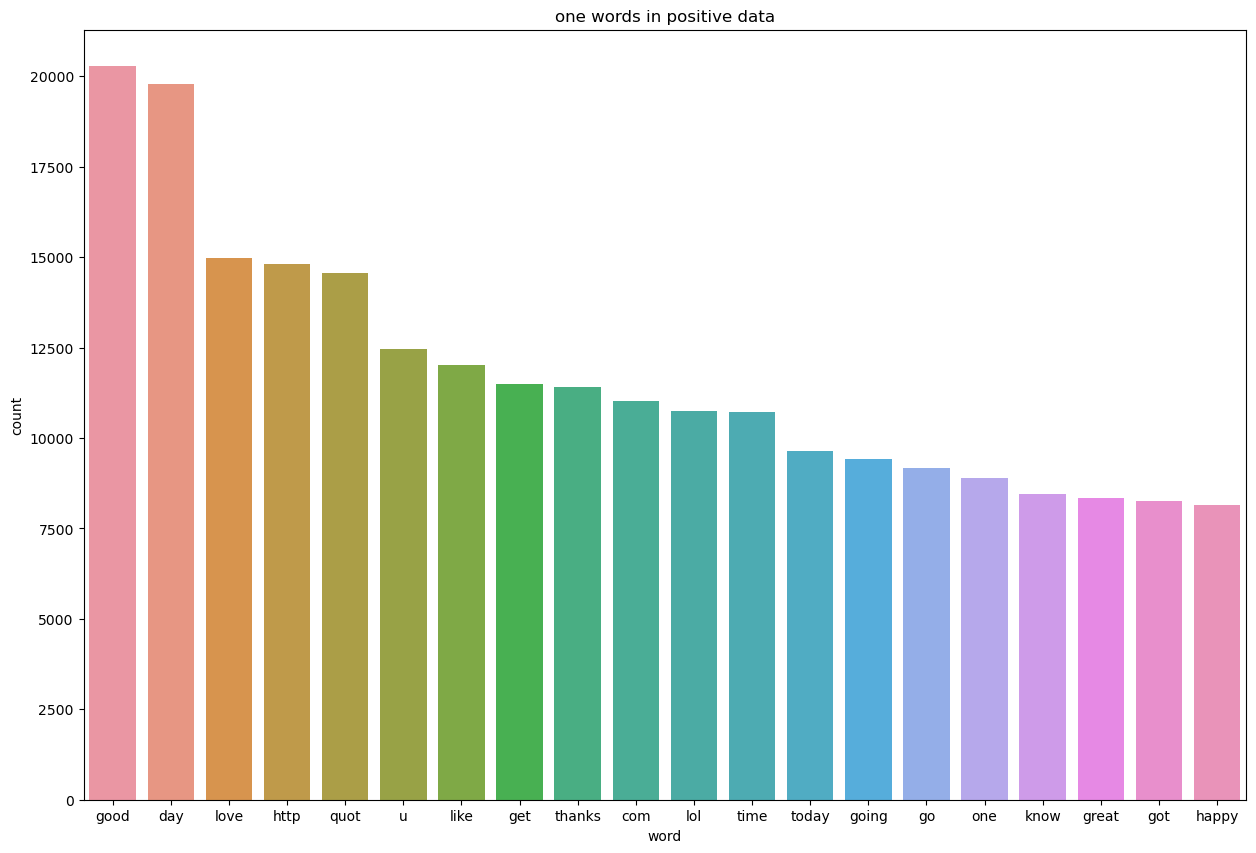

In [70]:
import seaborn as sns
plt.figure(figsize = (15,10))
sns.barplot(x = count_corpus["word"][:20], y = count_corpus["count"][:20])
plt.title('one words in positive data')
plt.show()

In [79]:
def get_count(data):
    dic = {}
    for i in data:
        for j in i:
            if j not in dic:
                dic[j]=1
            else:
                dic[j]+=1    
            
    #dic = dict(sorted(dic.items() , key = lambda x:x[1],reverse=True))
    return(dic)
count_corpus = get_count(negative_list)

In [80]:
count_corpus = pd.DataFrame({"word":count_corpus.keys(),"count":count_corpus.values()})
count_corpus = count_corpus.sort_values(by = "count", ascending = False)

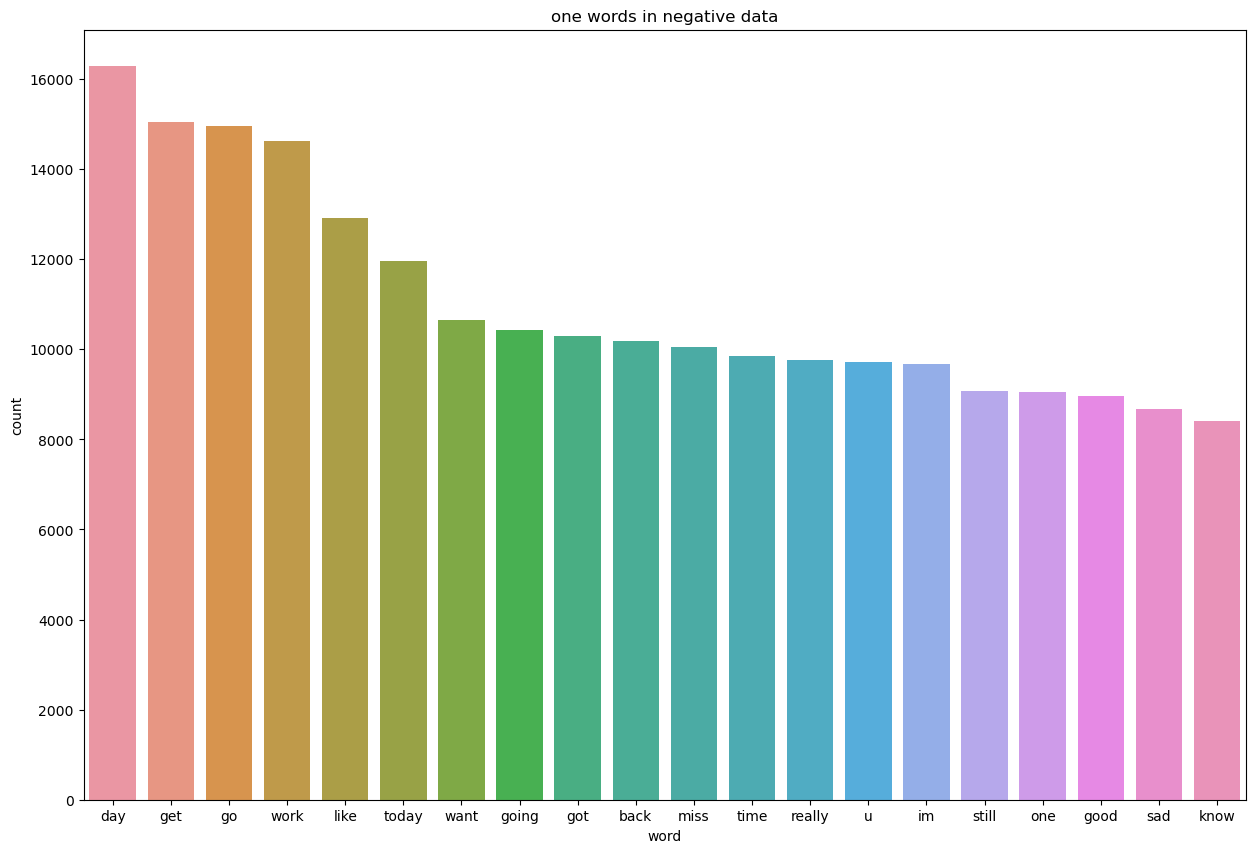

In [81]:
import seaborn as sns
plt.figure(figsize = (15,10))
sns.barplot(x = count_corpus["word"][:20], y = count_corpus["count"][:20])
plt.title('one words in negative data')
plt.show()

**Inference**
* Positive data has words like good, day, thanks, great, happy
* Negative data has words like work, miss, sad etc

# Classification 


In [109]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

## TFIDF for sentiment analysis

In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
xt = tfidf.fit_transform(data_cleaned['text'])
y = data_cleaned['Sentiment']

## Train Test Split

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xt, 
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=42,
                                                    stratify = y)

In [110]:
def metrics(y_train,y_train_pred,y_test,y_test_pred):
  print("training accuracy = ",round(accuracy_score(y_train,y_train_pred),2)*100)
  ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,normalize = 'all')
  print(classification_report(y_train,y_train_pred))
  plt.show()

  print("testing accuracy = ",round(accuracy_score(y_test,y_test_pred),2)*100)
  ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred,normalize = 'all')
  print(classification_report(y_test,y_test_pred))
  plt.show()

### Multinomial Naive Bayes

training accuracy =  85.0
              precision    recall  f1-score   support

           0       0.83      0.88      0.85    166545
           1       0.87      0.82      0.85    166546

    accuracy                           0.85    333091
   macro avg       0.85      0.85      0.85    333091
weighted avg       0.85      0.85      0.85    333091



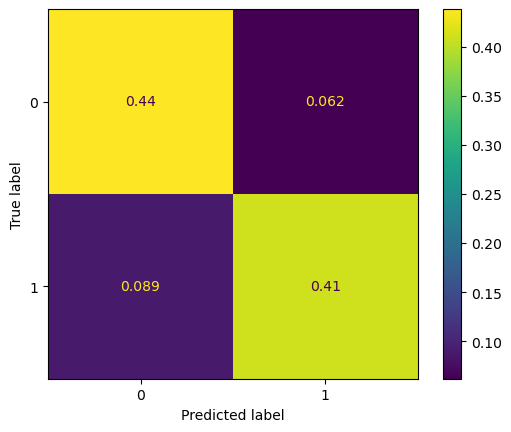

testing accuracy =  76.0
              precision    recall  f1-score   support

           0       0.75      0.80      0.77     82031
           1       0.78      0.73      0.75     82030

    accuracy                           0.76    164061
   macro avg       0.76      0.76      0.76    164061
weighted avg       0.76      0.76      0.76    164061



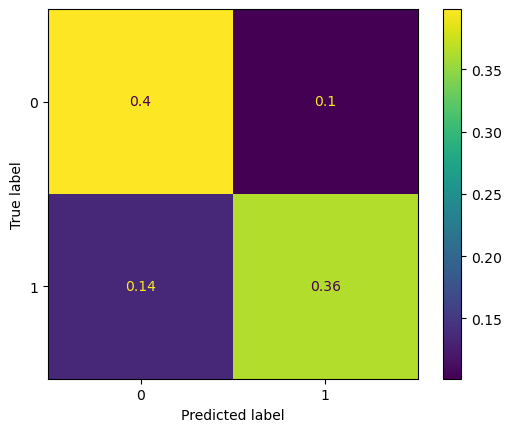

In [112]:
NB = MultinomialNB()
NB.fit(X_train,y_train)
y_train_pred = NB.predict(X_train)
y_test_pred = NB.predict(X_test)
metrics(y_train,y_train_pred,y_test,y_test_pred)

### Linear SVC

training accuracy =  90.0
              precision    recall  f1-score   support

           0       0.90      0.90      0.90    166545
           1       0.90      0.90      0.90    166546

    accuracy                           0.90    333091
   macro avg       0.90      0.90      0.90    333091
weighted avg       0.90      0.90      0.90    333091



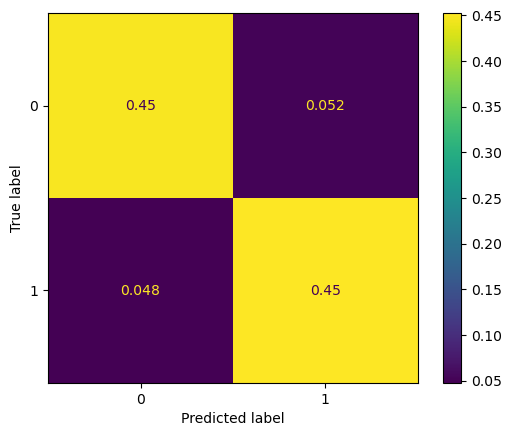

testing accuracy =  77.0
              precision    recall  f1-score   support

           0       0.78      0.76      0.77     82031
           1       0.76      0.78      0.77     82030

    accuracy                           0.77    164061
   macro avg       0.77      0.77      0.77    164061
weighted avg       0.77      0.77      0.77    164061



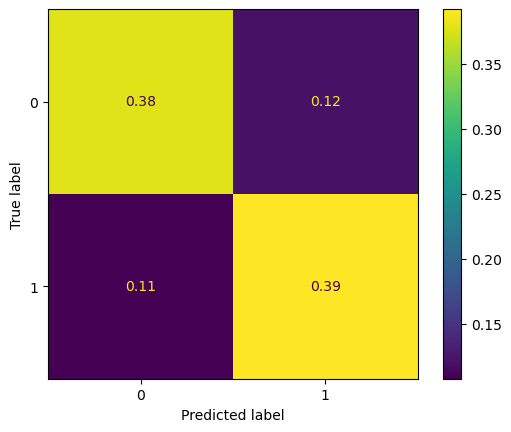

In [113]:
svc = LinearSVC()
svc.fit(X_train,y_train)
y_train_pred = svc.predict(X_train)
y_test_pred = svc.predict(X_test)
metrics(y_train,y_train_pred,y_test,y_test_pred)


### Logistic regression

training accuracy =  83.0
              precision    recall  f1-score   support

           0       0.84      0.81      0.82    166545
           1       0.82      0.84      0.83    166546

    accuracy                           0.83    333091
   macro avg       0.83      0.83      0.83    333091
weighted avg       0.83      0.83      0.83    333091



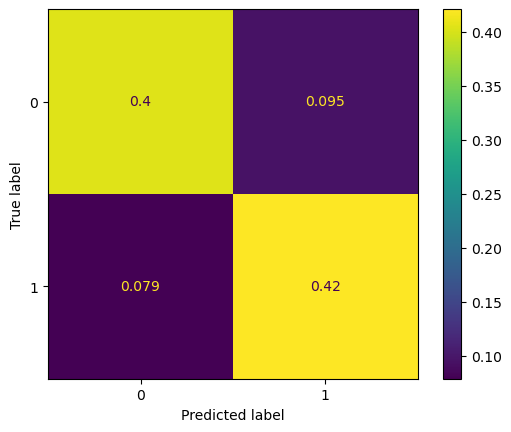

testing accuracy =  78.0
              precision    recall  f1-score   support

           0       0.79      0.75      0.77     82031
           1       0.77      0.80      0.78     82030

    accuracy                           0.78    164061
   macro avg       0.78      0.78      0.78    164061
weighted avg       0.78      0.78      0.78    164061



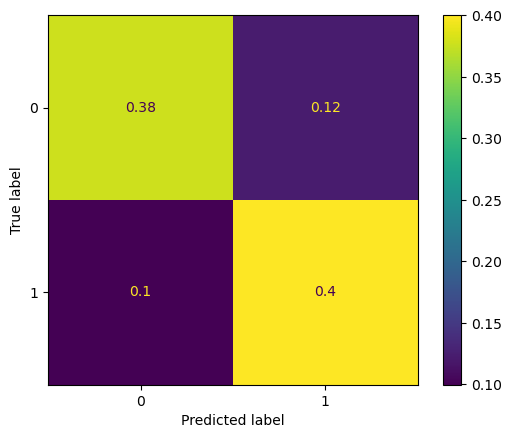

In [114]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
metrics(y_train,y_train_pred,y_test,y_test_pred)

## Conclusion

|Model|Training Accuracy|Testing Accuracy|
|---|---|---|
|Multinomial NB| 85%|76%|
|linear SVC|90%|77%|
|Logistic|83%|78%|




We see that Logistic regression model performs best with least overfitting as compared to other models and has better performance in testing dataset as well